In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [3]:
# import iris dataset
iris = datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
x= iris_df.iloc[:, :-1]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y= iris_df.iloc[:, -1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [7]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2, # 20% of the data would be tested by the model
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

                        

In [8]:
# train  of x , y data which i will implement the code on it
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)
# test of x , y data which i will test the code on it by my model
x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [11]:
print('Training set size:',x_train.shape[0],'samples \nTest set size:',x_test.shape[0],' samples')


Training set size: 120 samples 
Test set size: 30  samples


In [12]:
# the scaler is fitted to the training set
scaler= Normalizer().fit(x_train) 
# the scaler is applied to the training set
normalized_x_train= scaler.transform(x_train)
# the scaler is applied to the test set
normalized_x_test= scaler.transform(x_test) 

In [17]:
print('x train before Normalization')
print(x_train[:5])


x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]


In [18]:
print('x train after Normalization')
print(normalized_x_train[:5])

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1, 'Pair Plot of the dataset Before normalization')

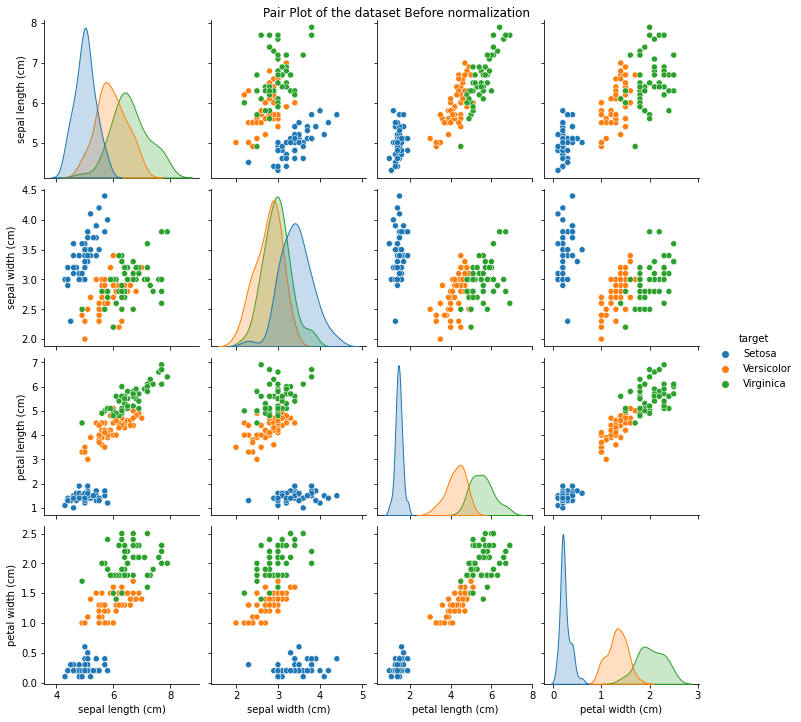

In [22]:
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa',
     1.0: 'Versicolor',
     2.0:'Virginica'} 
#Plot the data 
before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1)



Text(0.5, 1, 'Pair Plot of the dataset After normalization')

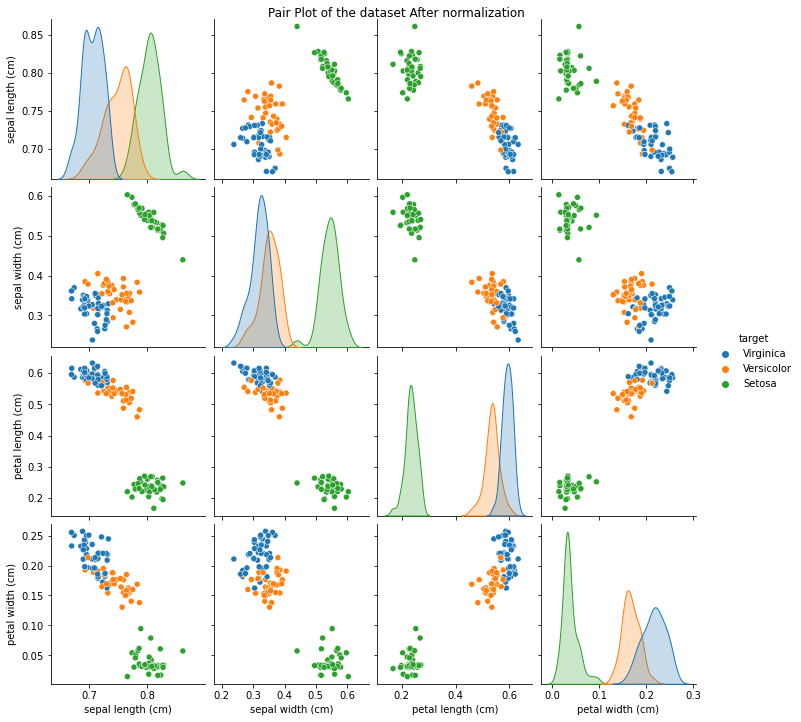

In [24]:
# After Normalization
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa',
     1.0: 'Versicolor',
     2.0: 'Virginica'}
#Plot the data
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1)

In [30]:
def distance_eculidian(x_train, x_test_point):
# STEP1: calculate the distance between all the data point in the data set
    distances= [] 
    # Loop over the rows of x_train
    for i in range(len(x_train)): 
        current_train= x_train[i] 
        current_distance= 0 ## initialize the distance by zero
        # Loop over the columns of the row
        for j in range(len(current_train)): 
            current_distance += (current_train[j] - x_test_point[j]) **2
            current_distance= np.sqrt(current_distance)

        distances.append(current_distance) 

  # Store distances in a dataframe
    distances= pd.DataFrame(data=distances,columns=['distance'])
    return distances


In [38]:
def nearest_neighbors(distance_point, K):

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['distance'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest


In [32]:
def voting(df_nearest, y_train):

    ## Use the Counter Object to get the labels with K nearest neighbors.
    count_vote= Counter(y_train[df_nearest.index])

    y_prediction= count_vote.most_common()[0][0]   # Majority Voting

    return y_prediction

In [36]:
def KNN_algorithm(x_train, y_train, x_test, K):

    y_prediction=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
        distance_point  = distance_eculidian(x_train, x_test_point)  ## Step 1
        df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
        y_prediction_point    = voting(df_nearest_point, y_train) ## Step 3
        y_prediction.append(y_prediction_point)

    return y_prediction  

In [39]:
K=7
y_prediction= KNN_algorithm(normalized_x_train, y_train, normalized_x_test, K)
y_prediction

[2.0,
 1.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0]

In [49]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_prediction_sklearn= knn.predict(normalized_x_test)
y_prediction_sklearn

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       2., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [50]:
#Check if the output is exactly the same data on y train 
print(np.array_equal(y_prediction_sklearn, y_prediction))


True


In [52]:
print('The accuracy of our implementation is ',accuracy_score(y_test, y_prediction))
print('The accuracy of sklearn implementation is ',accuracy_score(y_test, y_prediction_sklearn))

The accuracy of our implementation is  0.9666666666666667
The accuracy of sklearn implementation is  0.9666666666666667
